In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import  matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression 

In [2]:
df = pd.read_csv('payment_fraud.csv')

In [3]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [4]:
df.isnull().sum() ## checking the null valeus 

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

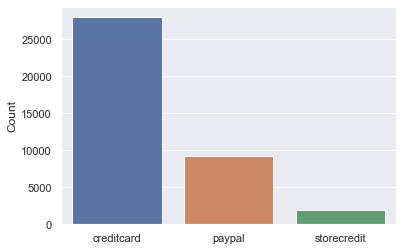

In [5]:
sns.set_theme()
paymthd = df.paymentMethod.value_counts()
sns.barplot(x=paymthd.index, y=paymthd);
plt.ylabel('Count');

In [6]:
df.label.value_counts() ## count the number of 0's and 1's

0    38661
1      560
Name: label, dtype: int64

In [7]:
## coverting paymentMethod column into label encoding
paymthd_label = {v:k for k, v in enumerate(df.paymentMethod.unique())}

df.paymentMethod = df.paymentMethod.map(paymthd_label)

In [8]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,0,28.204861,0
1,725,1,4.742303,1,0.000000,0
2,845,1,4.921318,2,0.000000,0
3,503,1,4.886641,2,0.000000,0
4,2000,1,5.040929,2,0.000000,0


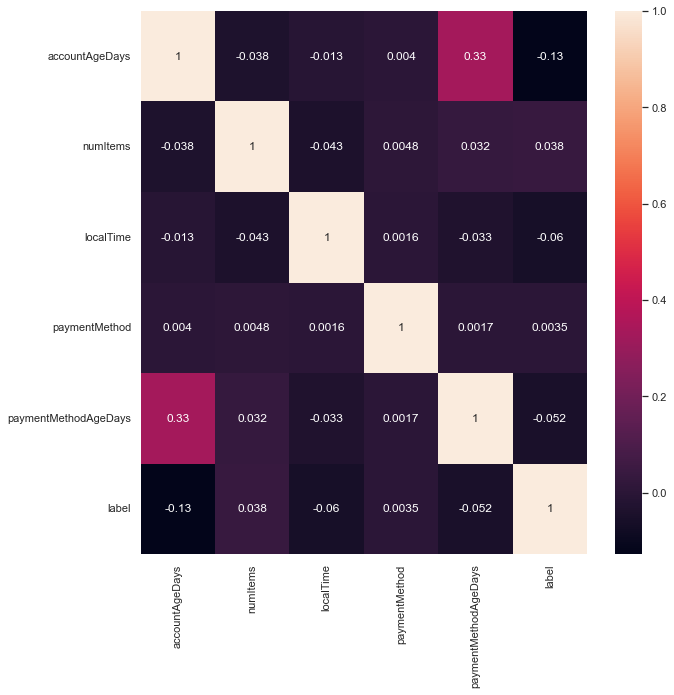

In [9]:
## correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);

In [10]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,1.476811,122.641326,0.014278
std,804.788212,0.566899,0.389360,0.850805,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,1.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,2.000000,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,2.000000,87.510417,0.000000
max,2000.000000,29.000000,5.040929,2.000000,1999.580556,1.000000


In [11]:
## independent and dependent features
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
## scaling 

sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
## train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (29415, 5)
X_test shape:  (9806, 5)
y_train shape:  (29415,)
y_test shape:  (9806,)


In [15]:
from sklearn.model_selection import cross_validate
lg = LogisticRegression()
cv_results = cross_validate(lg, X_train, y_train, cv=10)

cv_results['test_score']

array([0.985724  , 0.985724  , 0.985724  , 0.985724  , 0.98538409,
       0.98537912, 0.98571914, 0.98571914, 0.9850391 , 0.98571914])

In [16]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l2', 'none']}
clf = GridSearchCV(lg, parameters)
clf.fit(X_train, y_train)

print(clf.best_params_)

{'penalty': 'none'}


In [17]:
cv_results = cross_validate(clf.best_estimator_, X_train, y_train, cv=10)

cv_results['test_score']

array([0.9996601, 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       ])

In [18]:
## prediction 
pred = clf.best_estimator_.predict(X_test)

----------------------------------------------------Accuracy------------------------------------------------------
1.0

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9664
           1       1.00      1.00      1.00       142

    accuracy                           1.00      9806
   macro avg       1.00      1.00      1.00      9806
weighted avg       1.00      1.00      1.00      9806


-------------------------------------------------Confustion Metrics----------------------------------------------------


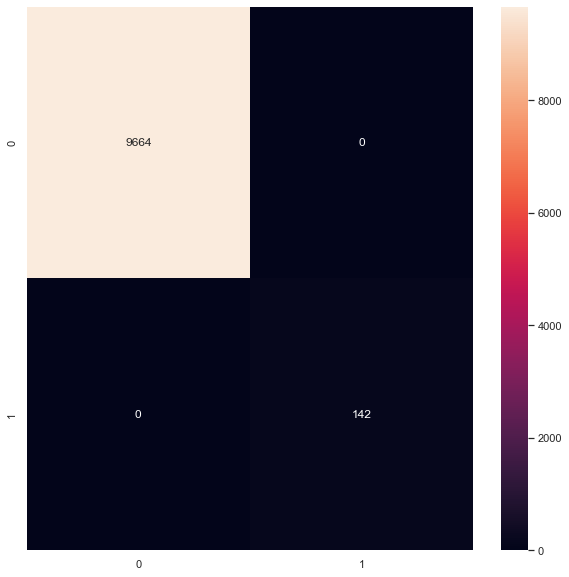

In [19]:
print("----------------------------------------------------Accuracy------------------------------------------------------")
print(accuracy_score(y_test, pred))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))
print()

print("-------------------------------------------------Confustion Metrics----------------------------------------------------")
plt.figure(figsize=(10, 10));
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');